In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import tensorflow_addons as tfa

In [8]:
# 这里先读取数据
csv_path = "../../数据获取/baostock/k线数据/sh.600000.csv"
df = pd.read_csv(csv_path)
df.date = pd.to_datetime(df.date)
_date = list(df.date)
df = df[['date','open','high','low','close','volume']]
# 这里要添加上星期几
df['week']=df.date.dt.dayofweek+1
week = list(df['week'])
volume = list(df['volume'])

In [9]:
# df = df[['open','high','low','close']]
# df = (df - df.mean()) / (df.std())
# df['week'] = week
# df['volume'] = volume
# df['date'] = _date

In [10]:
df.head()

,date,open,high,low,close,volume,week
0,2015-01-05,8.818609,9.024080,8.640904,8.924121,513568704,1
1,2015-01-06,8.885248,9.262871,8.785289,8.957441,511684528,2
2,2015-01-07,8.829715,8.979654,8.624244,8.779736,385716816,3
3,2015-01-08,8.813055,8.818609,8.440986,8.468752,330627168,4
4,2015-01-09,8.440986,9.024080,8.391006,8.568711,491999936,5


In [11]:
period = 20
X = []
Y = np.array(df.loc[period:, 'close'])
for i in range(0,len(df)-period):
    # 遍历每一个，然后添加进去
    X.append(df.loc[i:i+period-1,['open','high','low','close','volume', 'week']])
X = np.array(X).reshape(len(df)-period, period, 6)

In [12]:
# 这里拆分训练集和测试集
train_x, text_x, train_y, text_y = train_test_split(X, Y, test_size=0.2)

In [31]:
# 创建LST网络
regressor = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=train_x.shape[1:]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=50, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=50, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=1)
])

In [32]:
# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')
# Fitting the RNN to the Training set
history = regressor.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(text_x, text_y))

Train on 1341 samples, validate on 336 samples
Epoch 1/10
1341/1341 [==============================] - 35s 26ms/sample - loss: 96.2102 - val_loss: 82.4659
Epoch 2/10
1341/1341 [==============================] - 2s 2ms/sample - loss: 80.9136 - val_loss: 56.9304
Epoch 3/10
1341/1341 [==============================] - 3s 2ms/sample - loss: 55.7911 - val_loss: 23.7805
Epoch 4/10
1341/1341 [==============================] - 2s 2ms/sample - loss: 24.6717 - val_loss: 1.9972
Epoch 5/10
1341/1341 [==============================] - 2s 1ms/sample - loss: 11.2085 - val_loss: 1.2349
Epoch 6/10
1341/1341 [==============================] - 2s 1ms/sample - loss: 8.4705 - val_loss: 0.4629
Epoch 7/10
1341/1341 [==============================] - 2s 2ms/sample - loss: 7.3604 - val_loss: 0.4564
Epoch 8/10
1341/1341 [==============================] - 2s 1ms/sample - loss: 6.3212 - val_loss: 0.2584
Epoch 9/10
1341/1341 [==============================] - 2s 1ms/sample - loss: 5.8029 - val_loss: 0.9018
Epoch 1

In [33]:
history

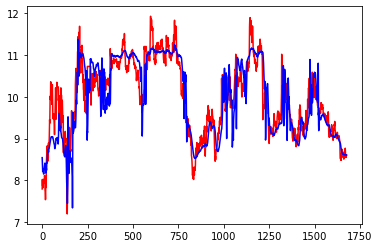

In [34]:
# 这里看看预测的吧
# 测试集输入模型进行预测
predicted_stock_price = regressor.predict(X)

# 然后显示曲线
# 画出真实数据和预测数据的对比曲线
plt.plot(Y, color='red', label='MaoTai Stock Price')
plt.plot(predicted_stock_price.reshape(-1,), color='blue', label='Predicted MaoTai Stock Price')